# AIDI 1002 Final Term Project Report

#### Anup Regmi - 200576708@student.georgianc.on.ca
#### Biplab Shakya - 200577549@student.georgianc.on.ca

# Introduction:

#### Problem Description:

The primary challenge lies in building robust models that can capture the complex patterns and trends in stock prices. Traditional methods often fall short in providing accurate predictions due to the nonlinear and dynamic nature of financial markets. 

#### Context of the Problem:

Addressing the challenge of building robust models for stock price prediction is crucial for fostering informed decision-making, managing risks, promoting market efficiency, and supporting economic stability. 

#### Limitation About other Approaches:

Prior approaches to stock price prediction, such as linear regression and traditional machine learning models, have struggled due to their assumptions of linearity, stationarity, and limited feature representation. These methods often fail to capture the complex, nonlinear dynamics of financial markets, leading to suboptimal performance, sensitivity to anomalies, and challenges in adapting to evolving market conditions.

#### Solution:

The purpose of our project is to identify which model, ARIMA or Random Forest Regressor or Support Vector Regressor, is more accurate at predicting stock prices in order to assist investors, financial analysts, and data scientists in making better decisions in actual financial markets.

# Background


| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| V Kranthi, Sai Reddy [1] | The authors used Support Vector Machine (SVM) to forecast stock values for companies with high and small capitalizations. | Nifty50-stocks-dataset | Only used SVM
| Sidra Mehtab and Jaydip Sen [2] | Using statistical and machine learning approaches, they create eight classification and eight regression models. In addition to these models, two deep learning-based regression models for reliable stock price prediction | Nifty50-stocks-dataset | Used traditional algorithms
| Sima Siami-Namini et al. [3] | Examined Deep learning-based algorithms such as LSTM outperform traditional-based algorithms such as the ARIMA model. | Nifty50-stocks-dataset | 
| Kohzadi, Nowrouz, et al. [4] | Analyzed that neural network models have a 27% and 56% lower mean squared error than the ARIMA model. In addition, the neural network models exhibited reduced absolute mean error and mean absolute percent error. | Nifty50-stocks-dataset |
| Chakraborty, Kanad, et al. [5] | Built feedforward connectionist networks to simulate flour prices in Buffalo, Minneapolis, and Kansas City. According to the findings, the neural network technology surpasses statistical modelling alternatives. | Yahoo Finance | 
| Jha, Girish K., and Kanchan Sinha[6] | Investigated the monthly price at wholesale for both soybean and rapeseed-mustard. |  | Only used ANN models
| Yao, Jingtao, and Chew Lim Tan [7] | Examined and predicted exchange rates between the US dollar and other key currencies such as the Japanese yen, the German mark, the British pound, the Swiss franc, and the Australian dollar. | Foreign Currency Exchange Rate | 

# Methodology

##### Data collection: For the years 2002 via 2020, stock price data for TATA steel based on the National Stock Exchange in India have been collected.
##### Data preparation: To completely remove any blank or false data points, the data gathered was pre-processed and wiped away.
##### Data splitting: The data was split into a training set and a testing set, with a split ratio of 80:20.
##### Model selection: Three different models were selected for the study – ARIMA, SVMR, and Random Forest Regressor
##### Model implementation: The selected models were implemented using Python programming language and google collab.
##### Model evaluation: The trained models were evaluated using the testing set. Each model was used to create predictions, and the Mean Sum of Error was used to compare the accuracy of the models. The absolute difference between the actual and forecast stock prices was calculated for each day, and the average of these disparities over the testing set was used to calculate the mean amount of error.

# Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_stock = pd.read_csv('TATASTEEL.csv', parse_dates=[0])
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4792 non-null   float64     

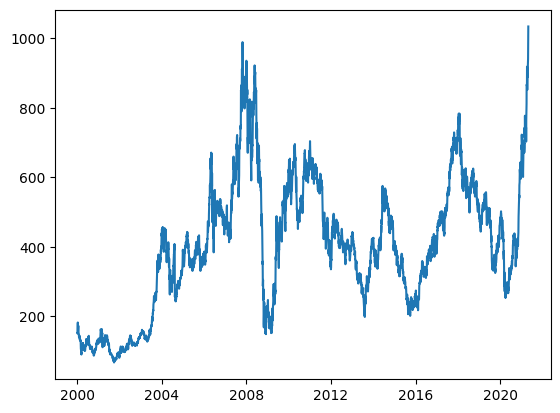

In [ ]:
# plt.figure(figsize=(10, 4))
plt.plot(df_stock['Date'], df_stock['Close'])

In [ ]:
#Dataframe with Date and Close price only
df_stock2 = df_stock[['Date', 'Close']]

In [ ]:
df_stock2[4236:]

,Date,Close,lag_1,diff_1
Date,,,,
2017-01-03,2017-01-03,403.30,406.75,-3.45
2017-01-04,2017-01-04,405.45,403.30,2.15
2017-01-05,2017-01-05,419.30,405.45,13.85
2017-01-06,2017-01-06,419.55,419.30,0.25
2017-01-09,2017-01-09,422.00,419.55,2.45
...,...,...,...,...
2021-04-26,2021-04-26,940.75,925.60,15.15
2021-04-27,2021-04-27,977.75,940.75,37.00
2021-04-28,2021-04-28,971.40,977.75,-6.35


In [ ]:
df_stock2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5306 non-null   datetime64[ns]
 1   Close   5306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 83.0 KB


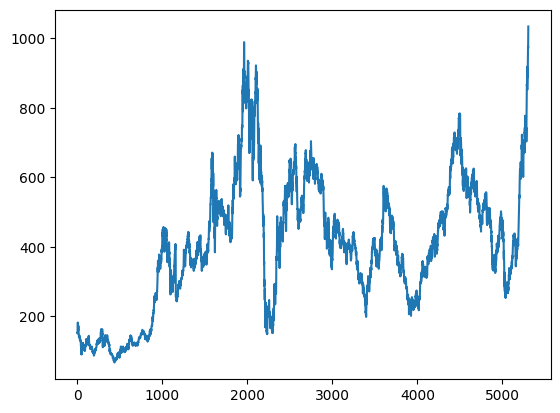

In [ ]:
plt.plot(df_stock2['Close'])

<Axes: ylabel='Close'>

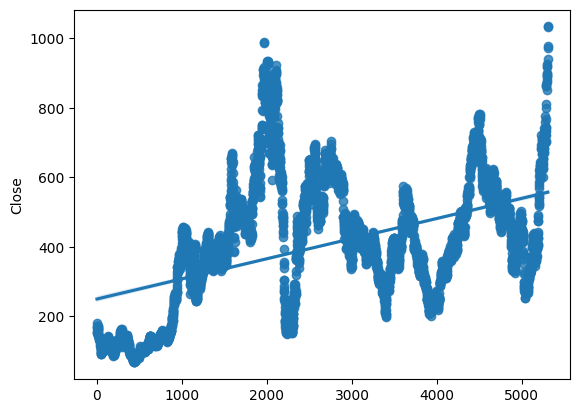

In [ ]:
# There is a positive trend
sns.regplot(x = df_stock2.index.values, y = df_stock['Close'])

In [ ]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

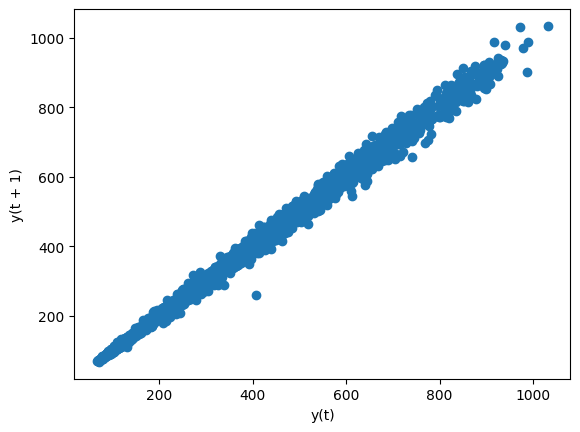

In [ ]:
#lag plot
lag_plot(df_stock2['Close'])

In [ ]:
# ## Autocorrelation plot
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

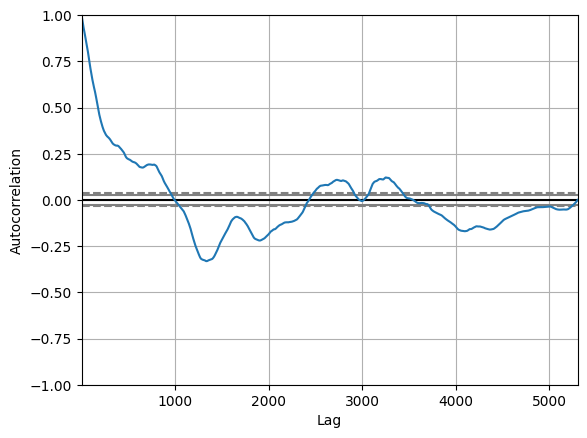

In [ ]:
autocorrelation_plot(df_stock2['Close'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_stock['Close'])
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -1.5164132967791808
p-value:  0.5253768561523071


In [ ]:
df_stock3 = df_stock2
df_stock3.index = df_stock3['Date']
df_stock3.head(5)

,Date,Close
Date,,
2000-01-03,2000-01-03,152.45
2000-01-04,2000-01-04,150.80
2000-01-05,2000-01-05,156.55
2000-01-06,2000-01-06,168.25
2000-01-07,2000-01-07,171.95


In [ ]:
result = adfuller(df_stock3['Close'])
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -1.5164132967791808
p-value:  0.5253768561523071


In [ ]:
# y(t) = Level + Trend + Seasonality + Noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(df_stock3['Close'], model='multiplicative', period=1)

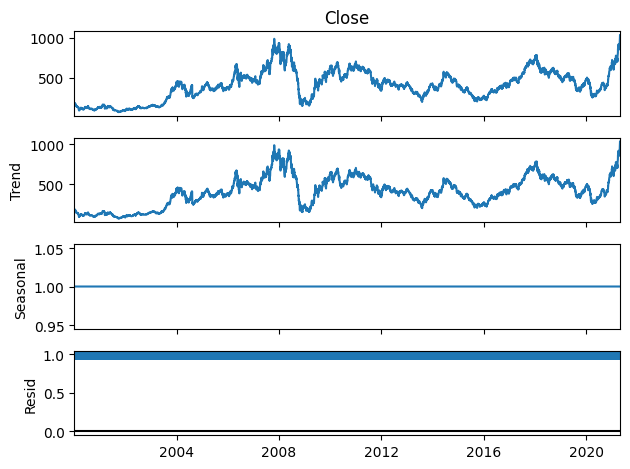

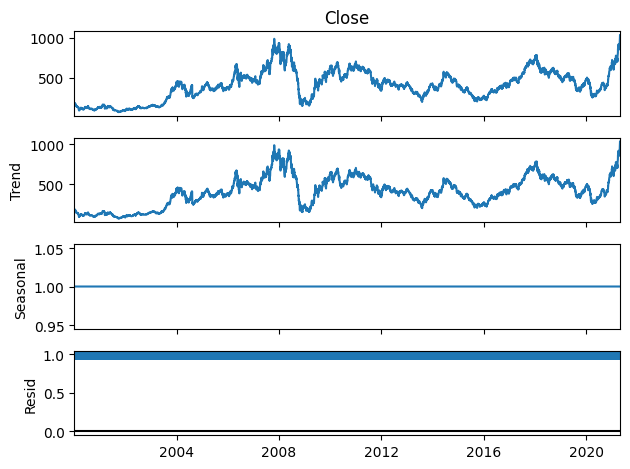

In [ ]:
result.plot()

In [ ]:
# Removing trend and seasonality using differencing
df_stock3.head()

,Date,Close
Date,,
2000-01-03,2000-01-03,152.45
2000-01-04,2000-01-04,150.80
2000-01-05,2000-01-05,156.55
2000-01-06,2000-01-06,168.25
2000-01-07,2000-01-07,171.95


# Applying Differenciation to convert non-stationary data in stationary data

In [ ]:
df_stock3['lag_1'] = df_stock3['Close'].shift(1)
df_stock3['diff_1'] = df_stock3['Close'].diff(periods = 1)
df_stock3.head()

<ipython-input-49-e2b25fe3cee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock3['lag_1'] = df_stock3['Close'].shift(1)
<ipython-input-49-e2b25fe3cee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock3['diff_1'] = df_stock3['Close'].diff(periods = 1)


,Date,Close,lag_1,diff_1
Date,,,,
2000-01-03,2000-01-03,152.45,NaN,NaN
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70


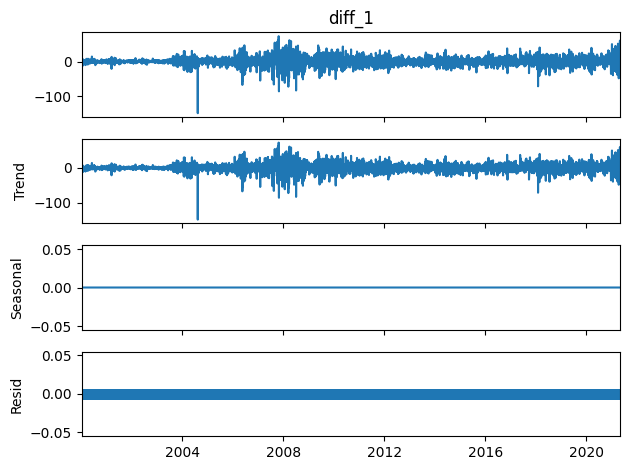

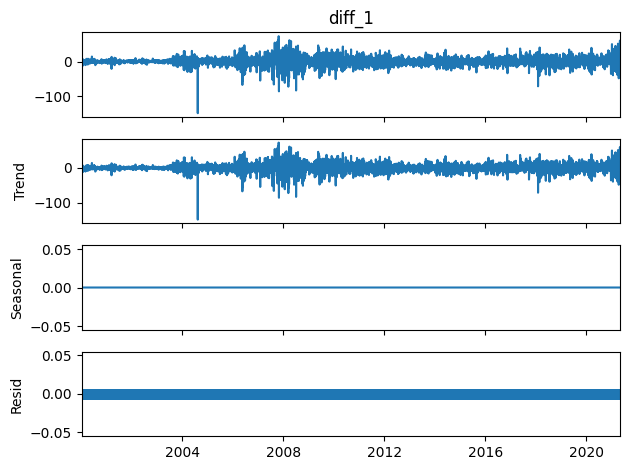

In [ ]:
result3 = seasonal_decompose(df_stock3.iloc[1:,3], model = 'additive', period =1)
result3.plot()

In [ ]:
result = adfuller(df_stock3['diff_1'].dropna())
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -23.822948777321024
p-value:  0.0


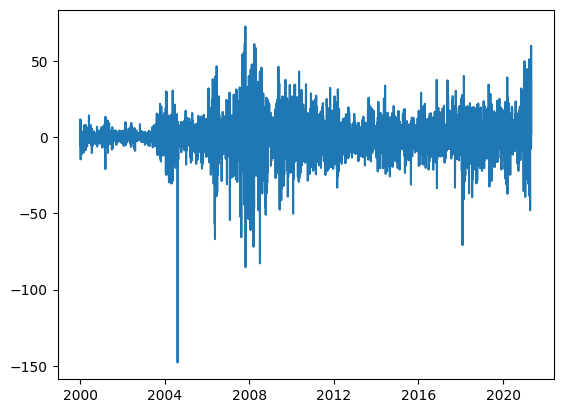

In [ ]:
plt.plot(df_stock3['diff_1'])

In [ ]:
result = adfuller(df_stock3['diff_1'].dropna())
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -23.822948777321024
p-value:  0.0


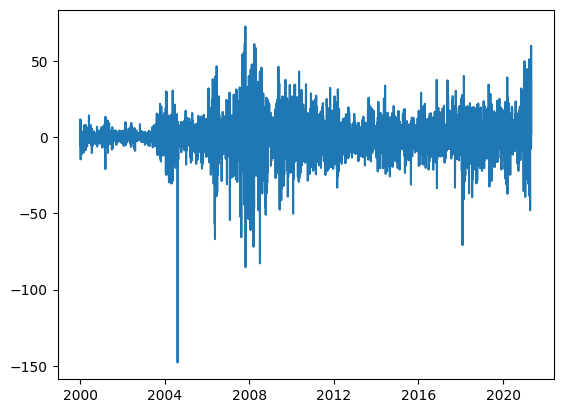

In [ ]:
plt.plot(df_stock3['diff_1'])

In [ ]:
# ## Create train and test datasets
train_size = int(df_stock3.shape[0]*0.8)
train_size

4244

In [ ]:
train = df_stock3[1:train_size-7]
test = df_stock3[train_size-7:]

In [ ]:
train.head()

,Date,Close,lag_1,diff_1
Date,,,,
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70
2000-01-10,2000-01-10,182.25,171.95,10.30


In [ ]:
train_x, train_y = train['lag_1'], train['Close']
test_x, test_y = test['lag_1'], test['Close']

In [ ]:
# Walk forward validation
predictions = test_x.copy()
predictions

Date
2017-01-04     403.30
2017-01-05     405.45
2017-01-06     419.30
2017-01-09     419.55
2017-01-10     422.00
               ...   
2021-04-26     925.60
2021-04-27     940.75
2021-04-28     977.75
2021-04-29     971.40
2021-04-30    1031.35
Name: lag_1, Length: 1069, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# mean squared error
mse = mean_squared_error(test_y, predictions)
mse

151.79322731524792

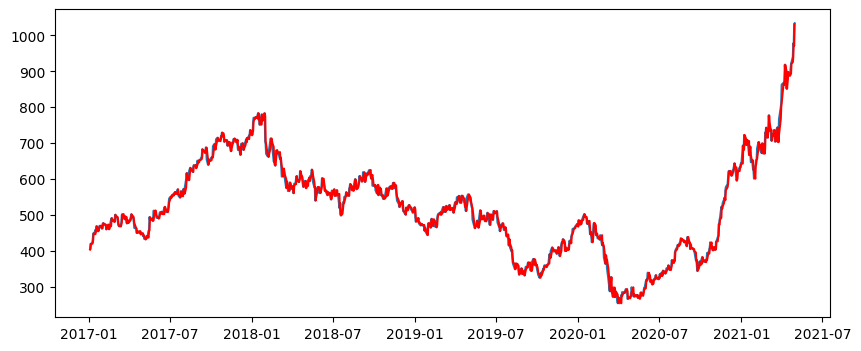

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_y)
plt.plot(predictions, color='red')

# ARIMA(p,d,q)

In [ ]:
# D = 1 value will be 1 as diff_1 is used (there is not quadratic trend)
# p = 6 As the partial autocorrelation plot shows that the 6 lag value is crossing interval
# q = 0 as tha autocorrelation plot shows that all the lag value is crossing the interval
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

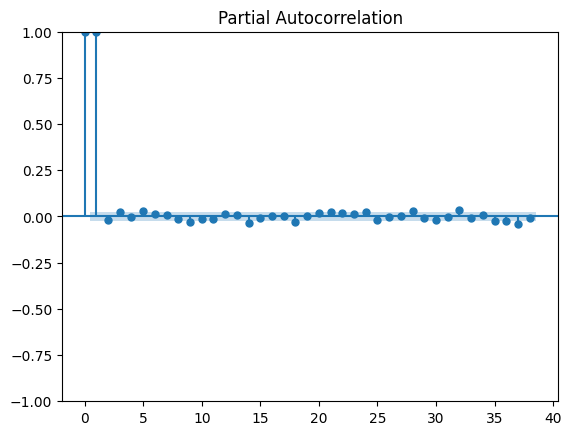

In [ ]:
plot_pacf(df_stock3['Close']);

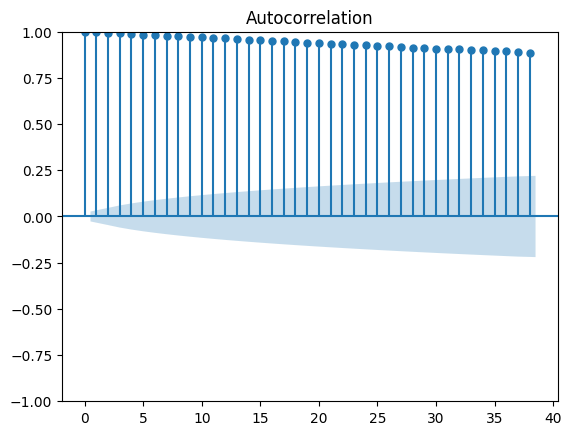

In [ ]:
plot_acf(df_stock3['Close']);

## Building ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_stock3['Close'], order = (2, 1, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5306
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -20606.833
Date:                Wed, 22 Nov 2023   AIC                          41219.666
Time:                        13:03:06   BIC                          41239.395
Sample:                             0   HQIC                         41226.560
                               - 5306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.009      3.214      0.001       0.011       0.046
ar.L2          0.0094      0.008      1.170      0.242      -0.006       0.025
sigma2       138.5545      1.121    123.610      0.000     136.358     140.751
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20522.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

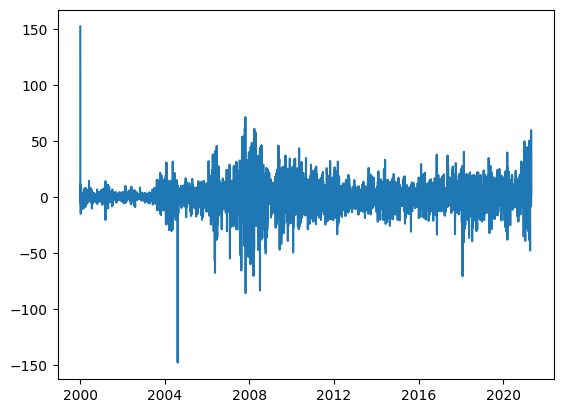

In [ ]:
residuals_arima = model_fit.resid
plt.plot(residuals_arima)

In [ ]:
residuals_arima.describe()

count    5306.000000
mean        0.188678
std        11.952295
min      -147.881343
25%        -4.922709
50%         0.145146
75%         5.420950
max       152.450000
dtype: float64

In [ ]:
train = df_stock3[1:train_size-7]
test = df_stock3[train_size-7:]
train.head()

,Date,Close,lag_1,diff_1
Date,,,,
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70
2000-01-10,2000-01-10,182.25,171.95,10.30


In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
print(pred[0:4])

Date
2017-01-03    407.184312
2017-01-04    403.346130
2017-01-05    405.479377
2017-01-06    419.717405
Name: predicted_mean, dtype: float64


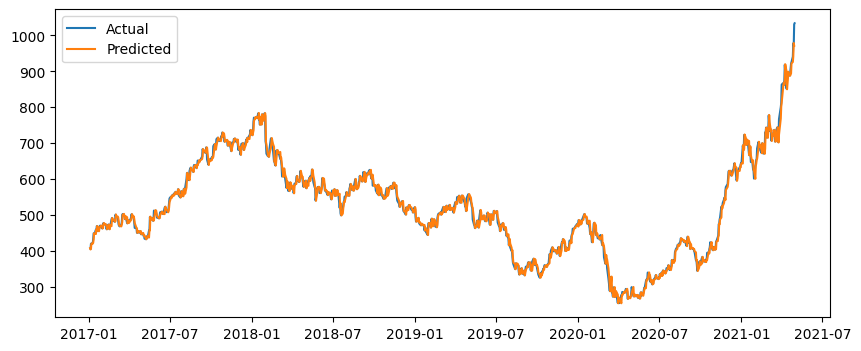

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test['Close'], label = 'Actual')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mes = mean_squared_error(pred, test['Close'])
mes

304.42491192507606

In [ ]:
test['Close'].mean(), np.sqrt(test['Close'].var())

(521.16604303087, 133.6514945893122)

## END OF ARIMA

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
dfr= pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
dfr

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,TISCO,EQ,142.35,148.00,153.20,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
2000-01-04,TISCO,EQ,152.45,150.10,153.00,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2000-01-05,TISCO,EQ,150.80,144.60,162.90,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
2000-01-06,TISCO,EQ,156.55,158.95,169.10,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
2000-01-07,TISCO,EQ,168.25,173.40,179.00,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TATASTEEL,EQ,925.60,935.00,956.00,930.05,942.50,940.75,942.98,21234858,2.002407e+15,274958.0,4584617.0,0.2159
2021-04-27,TATASTEEL,EQ,940.75,948.30,983.00,944.30,982.00,977.75,965.43,24904515,2.404346e+15,331493.0,3575969.0,0.1436
2021-04-28,TATASTEEL,EQ,977.75,985.00,986.00,962.00,971.00,971.40,972.08,20447968,1.987700e+15,255599.0,3550908.0,0.1737


In [ ]:
stock_data = dfr[['Close']]

In [ ]:
# Step 3: Create the lagged dataset
lags = 3 # number of lags to consider
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    stock_data[col] = stock_data['Close'].shift(lag)
    cols.append(col)
stock_data.dropna(inplace=True)

<ipython-input-46-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[col] = stock_data['Close'].shift(lag)
<ipython-input-46-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[col] = stock_data['Close'].shift(lag)
<ipython-input-46-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
# Step 4: Split the data into train and test sets
X = stock_data[cols]
y = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Step 5: Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 6: Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Step 7: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 220.20538585650303


In [ ]:
y_pred.var()

17555.85319286242

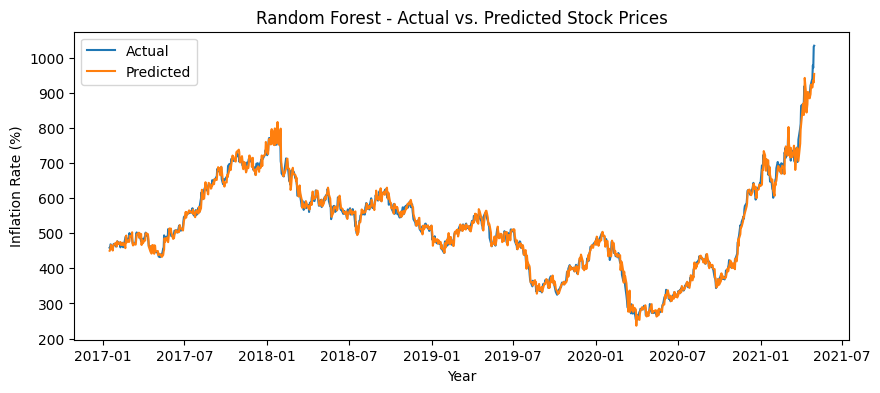

In [ ]:
# Step 8: Plot the actual and predicted values
plt.figure(figsize=(10, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Random Forest - Actual vs. Predicted Stock Prices')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfd= pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfd['Date'] = pd.to_datetime(dfd['Date'])
dfd = dfd.set_index('Date')

In [ ]:
data_stock = dfd[['Close']]

In [ ]:
data_stock.tail()

,Close
Date,
2021-04-26,940.75
2021-04-27,977.75
2021-04-28,971.40
2021-04-29,1031.35
2021-04-30,1034.00


In [ ]:
train_size = int(len(data_stock) * 0.8)
train_data = data_stock[:train_size]
test_data =  data_stock[train_size:]

In [ ]:
# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
#  Create the feature set and target set
def create_sets(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps-1):
    X.append(data[i:(i+n_steps), 0])
    y.append(data[i+n_steps, 0])
  return np.array(X), np.array(y)

n_steps = 3
X_train, y_train = create_sets(train_data, n_steps)
X_test, y_test = create_sets(test_data, n_steps)

In [ ]:
# Train the SVR model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [ ]:
# Predict the inflation values
y_pred = model.predict(X_test)
y_pred

array([0.38572344, 0.39452493, 0.39776993, ..., 0.94424747, 0.97058008,
       0.98392676])

In [ ]:
#  transform the predicted and actual values back to their original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

y_pred

array([[389696.64231535],
       [397172.96919411],
       [399929.39323341],
       ...,
       [864128.57502195],
       [886496.5145375 ],
       [897833.69985866]])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 907.9242934004044


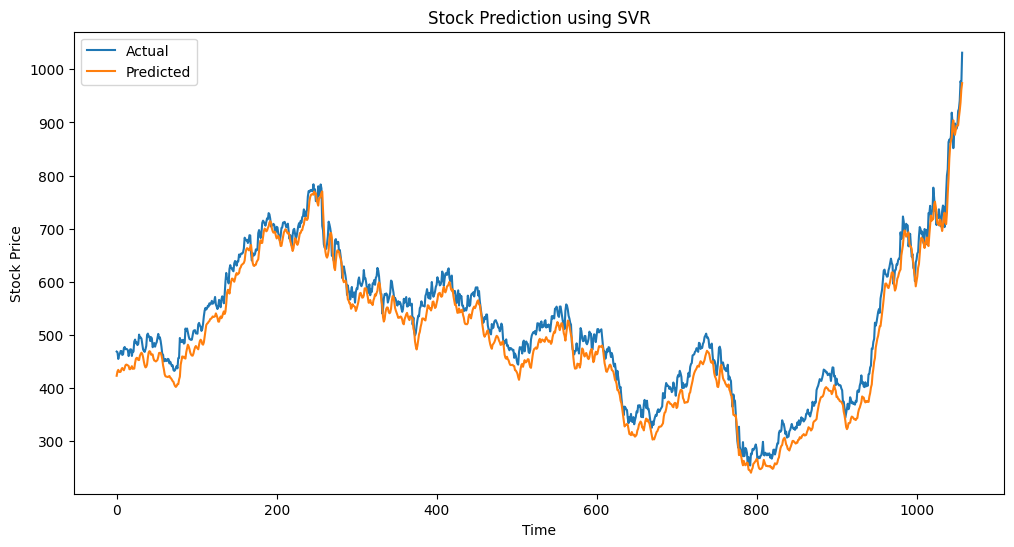

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Stock Prediction using SVR')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Conclusion and Future Direction

Using the Stock Price Index, we investigated how well different forecasting models estimate how much stock prices would climb in India each day. We contrast various machine learning-based approaches such as ARIMA/SARIMA, Random Forest, and Support Vector Machine Regressor. According to the research, the Random Forest Regressor model got the lowest error score (220.2053), making it the most accurate in making decisions. The other models, ARIMA/SARIMA, Support Vector Machine Regressor were closer in accuracy to Random Forest Regressor. This research suggests that Random Forest Regressor might be a valuable technique for forecasting stock process, whereas ARIMA/SARIMA remain feasible possibilities. According to the study, it is feasible to forecast future stock patterns by employing computers to learn and evaluate massive amounts of data.

One thing that is lacking in this project is that we did not use LSTM (Long Short-Term Memory) model. It is primarily because stock price time series is a daily data, because of which the model struggles to filter out the noise and focus on the relevant patterns.

# References:

##### [1] Reddy, V. Kranthi Sai. "Stock market prediction using machine learning." International Research Journal of Engineering and Technology (IRJET) 5.10 (2018): 1033-1035.
##### [2] Mehtab, Sidra, and Jaydip Sen. "A time series analysis-based stock price prediction using machine learning and deep learning models." International Journal of Business Forecasting and Marketing Intelligence 6.4 (2020): 272-335.
##### [3] Siami-Namini, Sima, Neda Tavakoli, and Akbar Siami Namin. "A comparison of ARIMA and LSTM in forecasting time series." 2018 17th IEEE international conference on machine learning and applications (ICMLA). IEEE, 2018.
##### [4] Kohzadi, Nowrouz, et al. "A comparison of artificial neural network and time series models for forecasting commodity prices." Neurocomputing 10.2 (1996): 169-181.
##### [5] Chakraborty, Kanad, et al. "Forecasting the behavior of multivariate time series using neural networks." Neural networks 5.6 (1992): 961- 970.
##### [6] Jha, Girish K., and Kanchan Sinha. "Agricultural price forecasting using neural network model: An innovative information delivery system." Agricultural Economics Research Review 26.347-2016- 17087 (2013): 229-239.
##### [7] Yao, Jingtao, and Chew Lim Tan. "A case study on using neural networks to perform technical forecasting of forex." Neurocomputing 34.1-4 (2000): 79-98.